Selenium是一个自动化测试工具，利用它可以驱动浏览器执行特定的动作，如点击、下拉等操作，同时还可以获取浏览器当前呈现的页面的源代码，做到可见即可爬。对于一些JavaScript动态渲染的页面来说，此种抓取方式非常有效。本节中，就让我们来感受一下它的强大之处吧。

# 1. 准备工作
本节以Chrome为例来讲解Selenium的用法。在开始之前，请确保已经正确安装好了Chrome浏览器并配置好了ChromeDriver。另外，还需要正确安装好Python的Selenium库，详细的安装和配置过程可以参考第1章。

## 2. 基本使用
准备工作做好之后，首先来大体看一下Selenium有一些怎样的功能。示例如下：

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait

browser = webdriver.Chrome()
try:
    browser.get('https://www.baidu.com')
    input = browser.find_element_by_id('kw')
    input.send_keys('Python')
    input.send_keys(Keys.ENTER)
    wati = WebDriverWait(browser, 10)
    wati.until(EC.presence_of_element_located((By.ID,'content_left')))
    print(browser.current_url)
    print(browser.page_source)
finally:
    browser.close()

https://www.baidu.com/s?ie=utf-8&f=8&rsv_bp=0&rsv_idx=1&tn=baidu&wd=Python&rsv_pq=e5e03b8d00012b2a&rsv_t=ef54N0z%2F%2BdwkU0j0G%2BBUzqk1FHp8P2dxSkhMQQwMHQAJCaCE%2FlPVep5yeio&rqlang=cn&rsv_enter=1&rsv_sug3=6&rsv_sug2=0&inputT=76&rsv_sug4=76
<!DOCTYPE html><!--STATUS OK--><html xmlns="http://www.w3.org/1999/xhtml"><head><script charset="utf-8" async="" src="https://ss0.bdstatic.com/-0U0bnSm1A5BphGlnYG/tam-ogel/5d4e9b24-dcc5-483a-b6da-be1e9e621891.js"></script>
    
    <meta http-equiv="content-type" content="text/html;charset=utf-8" /><style data-for="result" id="css_result" type="text/css">body{color:#333;background:#fff;padding:6px 0 0;margin:0;position:relative;min-width:900px}body,th,td,.p1,.p2{font-family:arial}p,form,ol,ul,li,dl,dt,dd,h3{margin:0;padding:0;list-style:none}input{padding-top:0;padding-bottom:0;-moz-box-sizing:border-box;-webkit-box-sizing:border-box;box-sizing:border-box}table,img{border:0}td{font-size:9pt;line-height:18px}em{font-style:normal;color:#c00}a em{text-de

所以说，如果用Selenium来驱动浏览器加载网页的话，就可以直接拿到JavaScript渲染的结果了，不用担心使用的是什么加密系统。

下面来详细了解一下Selenium的用法。

### 3. 声明浏览器对象
Selenium支持非常多的浏览器，如Chrome、Firefox、Edge等，还有Android、BlackBerry等手机端的浏览器。另外，也支持无界面浏览器PhantomJS。

此外，我们可以用如下方式初始化：

Selenium支持非常多的浏览器，如Chrome、Firefox、Edge等，还有Android、BlackBerry等手机端的浏览器。另外，也支持无界面浏览器PhantomJS。

此外，我们可以用如下方式初始化：

```
from selenium import webdriver
 
browser = webdriver.Chrome()
browser = webdriver.Firefox()
browser = webdriver.Edge()
browser = webdriver.PhantomJS()
browser = webdriver.Safari()
```

这样就完成了浏览器对象的初始化并将其赋值为browser对象。接下来，我们要做的就是调用browser对象，让其执行各个动作以模拟浏览器操作。

# 4. 访问页面
我们可以用get()方法来请求网页，参数传入链接URL即可。比如，这里用get()方法访问淘宝，然后打印出源代码，代码如下：

In [5]:
from selenium import webdriver
 
browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
print(browser.page_source)
browser.close()

<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="zh-CN" class="ks-webkit537 ks-webkit ks-chrome68 ks-chrome"><head><script src="https://headline.taobao.com/feed/homeFeed.do?_ksTS=1542356869808_131&amp;callBack=jsonp132" async=""></script><script charset="utf-8" src="https://tce.taobao.com/api/mget.htm?callback=jsonpXctrl106&amp;tce_sid=1947787&amp;tce_vid=0&amp;tid=&amp;tab=&amp;topic=&amp;count=&amp;env=online&amp;cna=undefined" async=""></script><script src="https://ald.taobao.com/recommend2.htm?appId=20140506002%2C20140506001%2C03014%2C07085&amp;_ksTS=1542356869796_93&amp;callback=jsonp94" async=""></script><script src="https://textlink.simba.taobao.com/?name=tbhs&amp;cna&amp;nn=&amp;count=13&amp;pid=430266_1006&amp;_ksTS=1542356869781_74&amp;callback=jsonp75" async=""></script>
<meta charset="utf-8" />
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
<meta name="renderer" content="webkit" />
<title>淘宝网 - 淘！我喜欢</title>
<meta name="spm-id" content="a21b

运行后发现，弹出了Chrome浏览器并且自动访问了淘宝，然后控制台输出了淘宝页面的源代码，随后浏览器关闭。

通过这几行简单的代码，我们可以实现浏览器的驱动并获取网页源码，非常便捷。

# 5. 查找节点
Selenium可以驱动浏览器完成各种操作，比如填充表单、模拟点击等。比如，我们想要完成向某个输入框输入文字的操作，总需要知道这个输入框在哪里吧？而Selenium提供了一系列查找节点的方法，我们可以用这些方法来获取想要的节点，以便下一步执行一些动作或者提取信息。

## 单个节点
比如，想要从淘宝页面中提取搜索框这个节点，首先要观察它的源代码，如图7-2所示。

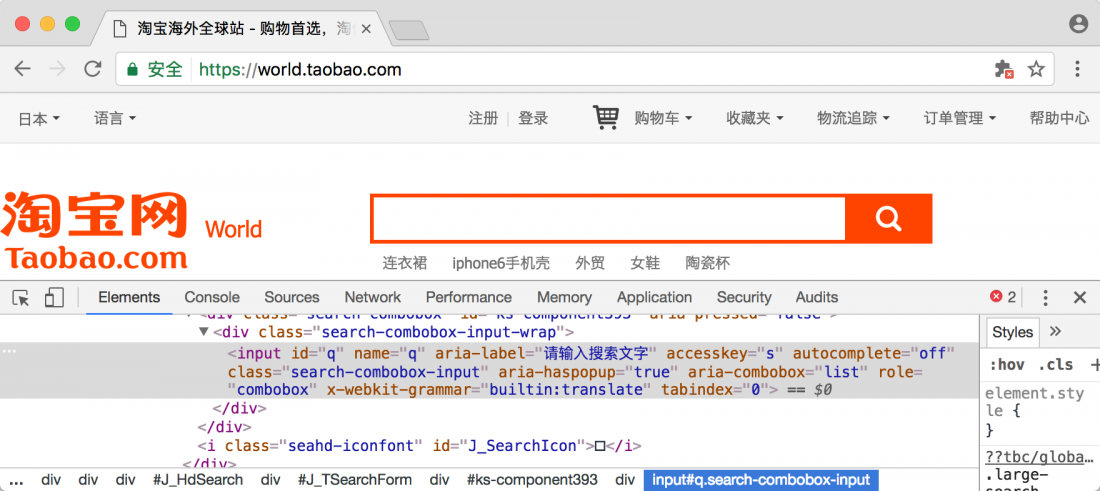

可以发现，它的id是q，name也是q。此外，还有许多其他属性，此时我们就可以用多种方式获取它了。比如，find_element_by_name()是根据name值获取，find_element_by_id()是根据id获取。另外，还有根据XPath、CSS选择器等获取的方式。

我们用代码实现一下：

In [6]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
input_first = browser.find_element_by_id('q')
input_second = browser.find_element_by_css_selector('#q')
input_third = browser.find_element_by_xpath('//*[@id="q"]')
print(input_first,input_second,input_third)
browser.close()

<selenium.webdriver.remote.webelement.WebElement (session="2a738bcf9a3651f6d85e4edf11bc295b", element="0.1757555714031993-1")> <selenium.webdriver.remote.webelement.WebElement (session="2a738bcf9a3651f6d85e4edf11bc295b", element="0.1757555714031993-1")> <selenium.webdriver.remote.webelement.WebElement (session="2a738bcf9a3651f6d85e4edf11bc295b", element="0.1757555714031993-1")>


这里我们使用3种方式获取输入框，分别是根据ID、CSS选择器和XPath获取，它们返回的结果完全一致。

这里列出所有获取单个节点的方法：

```
find_element_by_id
find_element_by_name
find_element_by_xpath
find_element_by_link_text
find_element_by_partial_link_text
find_element_by_tag_name
find_element_by_class_name
find_element_by_css_selector
```

另外，Selenium还提供了通用方法find_element()，它需要传入两个参数：查找方式By和值。实际上，它就是find_element_by_id()这种方法的通用函数版本，比如find_element_by_id(id)就等价于find_element(By.ID, id)，二者得到的结果完全一致。我们用代码实现一下：

In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
input_first = browser.find_element(By.ID,'q')
print(input_first)
browser.close()

<selenium.webdriver.remote.webelement.WebElement (session="cb8dcbccb8cb182346b9f2d703afd9c3", element="0.25250221348100244-1")>


实际上，这种查找方式的功能和上面列举的查找函数完全一致，不过参数更加灵活。

## 多个节点
如果查找的目标在网页中只有一个，那么完全可以用find_element()方法。但如果有多个节点，再用find_element()方法查找，就只能得到第一个节点了。如果要查找所有满足条件的节点，需要用find_elements()这样的方法。注意，在这个方法的名称中，element多了一个s，注意区分。

比如，要查找淘宝左侧导航条的所有条目，如图7-3所示。

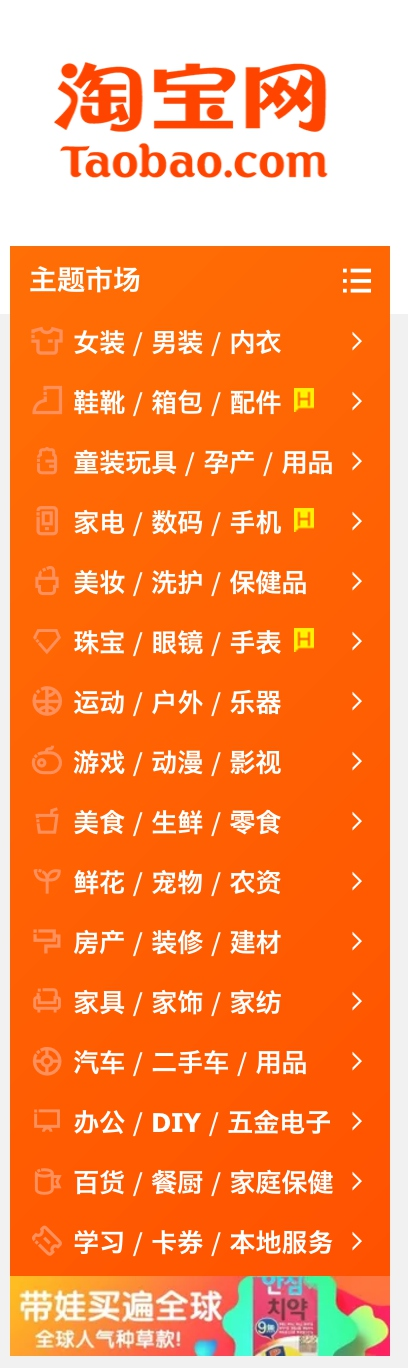

In [12]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
lis = browser.find_elements_by_css_selector('.service-bd li')
print(lis)
browser.close()

[<selenium.webdriver.remote.webelement.WebElement (session="cd442618f2075707a06da275b670ac98", element="0.9575135054255475-1")>, <selenium.webdriver.remote.webelement.WebElement (session="cd442618f2075707a06da275b670ac98", element="0.9575135054255475-2")>, <selenium.webdriver.remote.webelement.WebElement (session="cd442618f2075707a06da275b670ac98", element="0.9575135054255475-3")>, <selenium.webdriver.remote.webelement.WebElement (session="cd442618f2075707a06da275b670ac98", element="0.9575135054255475-4")>, <selenium.webdriver.remote.webelement.WebElement (session="cd442618f2075707a06da275b670ac98", element="0.9575135054255475-5")>, <selenium.webdriver.remote.webelement.WebElement (session="cd442618f2075707a06da275b670ac98", element="0.9575135054255475-6")>, <selenium.webdriver.remote.webelement.WebElement (session="cd442618f2075707a06da275b670ac98", element="0.9575135054255475-7")>, <selenium.webdriver.remote.webelement.WebElement (session="cd442618f2075707a06da275b670ac98", element="

这里简化了输出结果，中间部分省略。

可以看到，得到的内容变成了列表类型，列表中的每个节点都是WebElement类型。

也就是说，如果我们用find_element()方法，只能获取匹配的第一个节点，结果是WebElement类型。如果用find_elements()方法，则结果是列表类型，列表中的每个节点是WebElement类型。

这里列出所有获取多个节点的方法：

```
find_elements_by_id
find_elements_by_name
find_elements_by_xpath
find_elements_by_link_text
find_elements_by_partial_link_text
find_elements_by_tag_name
find_elements_by_class_name
find_elements_by_css_selector
```

当然，我们也可以直接用find_elements()方法来选择，这时可以这样写：

当然，我们也可以直接用find_elements()方法来选择，这时可以这样写：


`lis = browser.find_elements(By.CSS_SELECTOR, '.service-bd li')
`

# 6. 节点交互
Selenium可以驱动浏览器来执行一些操作，也就是说可以让浏览器模拟执行一些动作。比较常见的用法有：输入文字时用send_keys()方法，清空文字时用clear()方法，点击按钮时用click()方法。示例如下：

In [21]:
from  selenium import webdriver
import time

browser = webdriver.Chrome()
browser.get('https://www.baidu.com')
input = browser.find_element_by_id('kw')
input.send_keys('iPhone')
time.sleep(1)
input.clear()
input.send_keys('iPad')
button = browser.find_element_by_class_name('s_btn')
button.click()

这里首先驱动浏览器打开百度，然后用find_element_by_id()方法获取输入框，然后用send_keys()方法输入iPhone文字，等待一秒后用clear()方法清空输入框，再次调用send_keys()方法输入iPad文字，之后再用find_element_by_class_name()方法获取搜索按钮，最后调用click()方法完成搜索动作。

# 7. 动作链
在上面的实例中，一些交互动作都是针对某个节点执行的。比如，对于输入框，我们就调用它的输入文字和清空文字方法；对于按钮，就调用它的点击方法。其实，还有另外一些操作，它们没有特定的执行对象，比如鼠标拖曳、键盘按键等，这些动作用另一种方式来执行，那就是动作链。

比如，现在实现一个节点的拖曳操作，将某个节点从一处拖曳到另外一处，可以这样实现：

In [3]:
from selenium import webdriver
from selenium.webdriver import ActionChains

browser = webdriver.Chrome()
url = 'http://www.runoob.com/try/try.php?filename=jqueryui-api-droppable'
browser.get(url)
browser.switch_to.frame('iframeResult')
source = browser.find_element_by_css_selector('#draggable')
target = browser.find_element_by_css_selector('#droppable')
actions = ActionChains(browser)
actions.drag_and_drop(source, target)
actions.perform()
browser.close()

首先，打开网页中的一个拖曳实例，然后依次选中要拖曳的节点和拖曳到的目标节点，接着声明ActionChains对象并将其赋值为actions变量，然后通过调用actions变量的drag_and_drop()方法，再调用perform()方法执行动作，此时就完成了拖曳操作

# 8. 执行JavaScript
对于某些操作，Selenium API并没有提供。比如，下拉进度条，它可以直接模拟运行JavaScript，此时使用execute_script()方法即可实现，代码如下：

In [5]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
browser.execute_script('window.scrollTo(0,document.body.scrollHeight)')
browser.execute_script('alert("To Bottom")')

这里就利用execute_script()方法将进度条下拉到最底部，然后弹出alert提示框。

所以说有了这个方法，基本上API没有提供的所有功能都可以用执行JavaScript的方式来实现了。

# 9. 获取节点信息
前面说过，通过page_source属性可以获取网页的源代码，接着就可以使用解析库（如正则表达式、Beautiful Soup、pyquery等）来提取信息了。

不过，既然Selenium已经提供了选择节点的方法，返回的是WebElement类型，那么它也有相关的方法和属性来直接提取节点信息，如属性、文本等。这样的话，我们就可以不用通过解析源代码来提取信息了，非常方便。

接下来，就看看通过怎样的方式来获取节点信息吧。

## 获取属性
我们可以使用get_attribute()方法来获取节点的属性，但是其前提是先选中这个节点，示例如下：

In [6]:
from selenium import webdriver
from selenium.webdriver import ActionChains

browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
logo = browser.find_element_by_id('zh-top-link-logo')
print(logo)
print(logo.get_attribute('class'))

<selenium.webdriver.remote.webelement.WebElement (session="778067d9b05273571969a73af2c4d9a5", element="0.3200806736919144-1")>
zu-top-link-logo


## 获取文本值
每个WebElement节点都有text属性，直接调用这个属性就可以得到节点内部的文本信息，这相当于Beautiful Soup的get_text()方法、pyquery的text()方法，示例如下：

In [7]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
input = browser.find_element_by_class_name('zu-top-add-question')
print(input.text)
browser.close()

提问


## 获取id、位置、标签名和大小
另外，WebElement节点还有一些其他属性，比如id属性可以获取节点id，location属性可以获取该节点在页面中的相对位置，tag_name属性可以获取标签名称，size属性可以获取节点的大小，也就是宽高，这些属性有时候还是很有用的。示例如下：

In [8]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
input = browser.find_element_by_class_name('zu-top-add-question')
print(input.id)
print(input.location)
print(input.tag_name)
print(input.size)
browser.close()

0.7607987451675062-1
{'x': 675, 'y': 7}
button
{'height': 32, 'width': 66}


# 10. 切换Frame
我们知道网页中有一种节点叫作iframe，也就是子Frame，相当于页面的子页面，它的结构和外部网页的结构完全一致。Selenium打开页面后，它默认是在父级Frame里面操作，而此时如果页面中还有子Frame，它是不能获取到子Frame里面的节点的。这时就需要使用switch_to.frame()方法来切换Frame。示例如下：

In [12]:
import time
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

browser = webdriver.Chrome()
url = 'http://www.runoob.com/try/try.php?filename=jqueryui-api-droppable'
browser.get(url)
browser.switch_to.frame('iframeResult')
try:
    logo = browser.find_element_by_class_name('logo')
except NoSuchElementException:
    print('No LOGO')
browser.switch_to.parent_frame()
logo = browser.find_element_by_class_name('logo')
print(logo)
print(logo.text)

No LOGO
<selenium.webdriver.remote.webelement.WebElement (session="448ac165c51d25f29319efd1e7135072", element="0.9833588527657757-2")>
RUNOOB.COM


这里还是以前面演示动作链操作的网页为实例，首先通过switch_to.frame()方法切换到子Frame里面，然后尝试获取父级Frame里的logo节点（这是不能找到的），如果找不到的话，就会抛出NoSuchElementException异常，异常被捕捉之后，就会输出NO LOGO。接下来，重新切换回父级Frame，然后再次重新获取节点，发现此时可以成功获取了。

所以，当页面中包含子Frame时，如果想获取子Frame中的节点，需要先调用switch_to.frame()方法切换到对应的Frame，然后再进行操作。

# 11. 延时等待
在Selenium中，get()方法会在网页框架加载结束后结束执行，此时如果获取page_source，可能并不是浏览器完全加载完成的页面，如果某些页面有额外的Ajax请求，我们在网页源代码中也不一定能成功获取到。所以，这里需要延时等待一定时间，确保节点已经加载出来。

这里等待的方式有两种：一种是隐式等待，一种是显式等待。 

##  隐式等待
当使用隐式等待执行测试的时候，如果Selenium没有在DOM中找到节点，将继续等待，超出设定时间后，则抛出找不到节点的异常。换句话说，当查找节点而节点并没有立即出现的时候，隐式等待将等待一段时间再查找DOM，默认的时间是0。示例如下：

In [14]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.implicitly_wait(10)
browser.get('https://www.zhihu.com/explore')
input = browser.find_element_by_class_name('zu-top-add-question')
print(input)

<selenium.webdriver.remote.webelement.WebElement (session="cc6b9f162d278d9cf076436f23cea09c", element="0.7154895166712463-1")>


## 显式等待
隐式等待的效果其实并没有那么好，因为我们只规定了一个固定时间，而页面的加载时间会受到网络条件的影响。

这里还有一种更合适的显式等待方法，它指定要查找的节点，然后指定一个最长等待时间。如果在规定时间内加载出来了这个节点，就返回查找的节点；如果到了规定时间依然没有加载出该节点，则抛出超时异常。示例如下：

In [16]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

browser = webdriver.Chrome()
browser.get('https://www.taobao.com/')
wait = WebDriverWait(browser, 10)
input = wait.until(EC.presence_of_element_located((By.ID,'q')))
button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR,'.btn-search')))
print(input,button)

<selenium.webdriver.remote.webelement.WebElement (session="2c331460a1fea4ea8f5ca4f145a45af6", element="0.45864613089607564-1")> <selenium.webdriver.remote.webelement.WebElement (session="2c331460a1fea4ea8f5ca4f145a45af6", element="0.45864613089607564-2")>


这里首先引入WebDriverWait这个对象，指定最长等待时间，然后调用它的until()方法，传入要等待条件expected_conditions。比如，这里传入了presence_of_element_located这个条件，代表节点出现的意思，其参数是节点的定位元组，也就是ID为q的节点搜索框。

这样可以做到的效果就是，在10秒内如果ID为q的节点（即搜索框）成功加载出来，就返回该节点；如果超过10秒还没有加载出来，就抛出异常。

对于按钮，可以更改一下等待条件，比如改为element_to_be_clickable，也就是可点击，所以查找按钮时查找CSS选择器为.btn-search的按钮，如果10秒内它是可点击的，也就是成功加载出来了，就返回这个按钮节点；如果超过10秒还不可点击，也就是没有加载出来，就抛出异常。

运行代码，在网速较佳的情况下是可以成功加载出来的。

可以看到，控制台成功输出了两个节点，它们都是WebElement类型。

如果网络有问题，10秒内没有成功加载，那就抛出TimeoutException异常，此时控制台的输出如下：

```
TimeoutException Traceback (most recent call last)
<ipython-input-4-f3d73973b223> in <module>()
      7 browser.get('https://www.taobao.com/')
      8 wait = WebDriverWait(browser, 10)
----> 9 input = wait.until(EC.presence_of_element_located((By.ID, 'q')))
```

关于等待条件，其实还有很多，比如判断标题内容，判断某个节点内是否出现了某文字等。表7-1列出了所有的等待条件

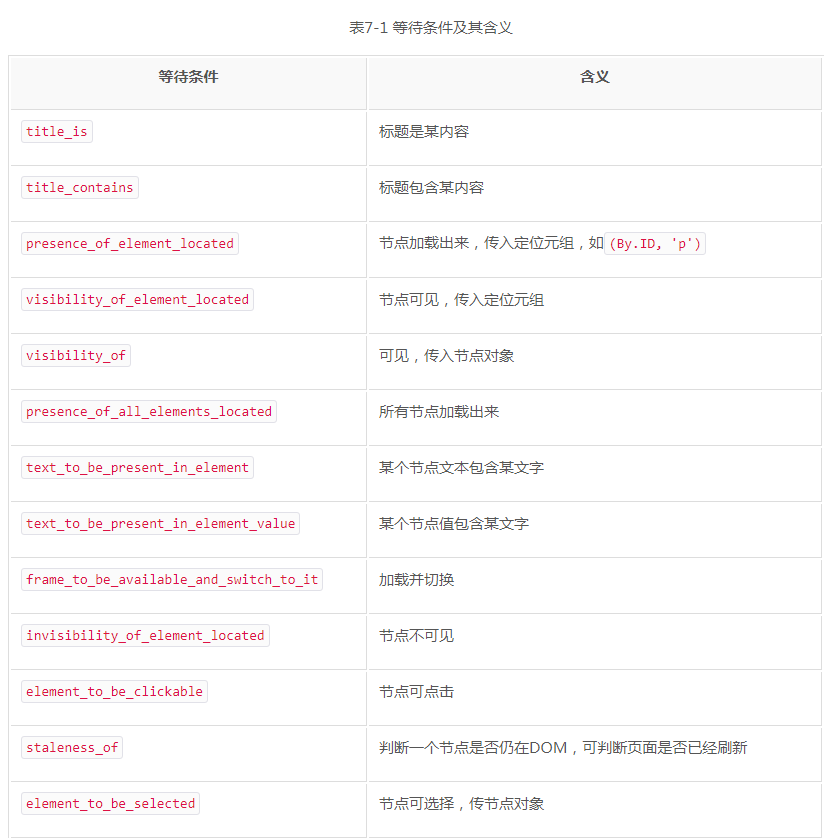

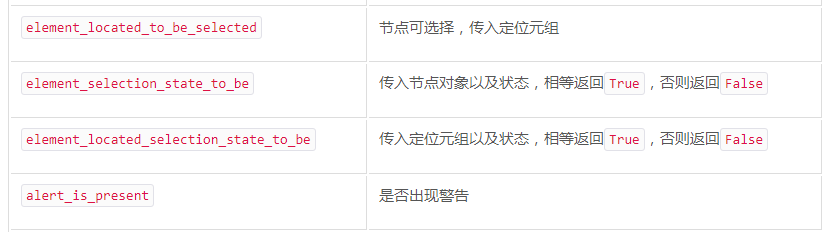

# 12. 前进和后退
平常使用浏览器时都有前进和后退功能，Selenium也可以完成这个操作，它使用back()方法后退，使用forward()方法前进。示例如下：

In [17]:
import time
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.baidu.com')
browser.get('https://www.taobao.com')
browser.get('https://www.python.org/')
browser.back()
time.sleep(1)
browser.forward()
browser.close()

# 13. Cookies
使用Selenium，还可以方便地对Cookies进行操作，例如获取、添加、删除Cookies等。示例如下：

In [19]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
print(browser.get_cookies())
browser.add_cookie({'name': 'name', 'domain': 'www.zhihu.com', 'value': 'germey'})
print(browser.get_cookies())
browser.delete_all_cookies()
print(browser.get_cookies())
browser.close()

[{'domain': '.zhihu.com', 'httpOnly': False, 'name': 'l_n_c', 'path': '/', 'secure': False, 'value': '1'}, {'domain': 'www.zhihu.com', 'expiry': 1542615778.997376, 'httpOnly': False, 'name': 'tgw_l7_route', 'path': '/', 'secure': False, 'value': '7139e401481ef2f46ce98b22af4f4bed'}, {'domain': '.zhihu.com', 'expiry': 1542616682, 'httpOnly': False, 'name': '__utmb', 'path': '/', 'secure': False, 'value': '51854390.0.10.1542614882'}, {'domain': '.zhihu.com', 'expiry': 1637222878.997424, 'httpOnly': False, 'name': 'q_c1', 'path': '/', 'secure': False, 'value': 'd5faf6cd06b64210b96161f05992bb19|1542614878000|1542614878000'}, {'domain': 'www.zhihu.com', 'httpOnly': False, 'name': '_xsrf', 'path': '/', 'secure': False, 'value': '275d341d5dbdca995e9163d01390adf5'}, {'domain': '.zhihu.com', 'expiry': 1545206878.997456, 'httpOnly': False, 'name': 'r_cap_id', 'path': '/', 'secure': False, 'value': '"NGNmOWYxZWQ0ODg1NDYxMTgyZWMxNTEyNGUzMGMyNzc=|1542614878|68b0eddffba4852d54c234eb1d78f974d088171f"'

首先，我们访问了知乎。加载完成后，浏览器实际上已经生成Cookies了。接着，调用get_cookies()方法获取所有的Cookies。然后，我们添加一个Cookie，这里传入一个字典，有name、domain和value等内容。接下来，再次获取所有的Cookies。可以发现，结果就多了这一项新加的Cookie。最后，调用delete_all_cookies()方法删除所有的Cookies。再重新获取，发现结果就为空了。

# 14. 选项卡管理
在访问网页的时候，会开启一个个选项卡。在Selenium中，我们也可以对选项卡进行操作。示例如下：

In [20]:
import time
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.baidu.com')
browser.execute_script('window.open()')
print(browser.window_handles)
browser.switch_to_window(browser.window_handles[1])
browser.get('https://www.taobao.com')
time.sleep(1)
browser.switch_to_window(browser.window_handles[0])
browser.get('https://python.org')

['CDwindow-9DD0283C630C3FE9B8BEA4CECA799398', 'CDwindow-4CA2B4B49FCC51C5A008ED025AFA16DC']


首先访问了百度，然后调用了execute_script()方法，这里传入window.open()这个JavaScript语句新开启一个选项卡。接下来，我们想切换到该选项卡。这里调用window_handles属性获取当前开启的所有选项卡，返回的是选项卡的代号列表。要想切换选项卡，只需要调用switch_to_window()方法即可，其中参数是选项卡的代号。这里我们将第二个选项卡代号传入，即跳转到第二个选项卡，接下来在第二个选项卡下打开一个新页面，然后切换回第一个选项卡重新调用switch_to_window()方法，再执行其他操作即可。

# 15. 异常处理
在使用Selenium的过程中，难免会遇到一些异常，例如超时、节点未找到等错误，一旦出现此类错误，程序便不会继续运行了。这里我们可以使用try except语句来捕获各种异常。

首先，演示一下节点未找到的异常，示例如下：

In [21]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.baidu.com')
browser.find_element_by_id('hello')

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"id","selector":"hello"}
  (Session info: chrome=68.0.3440.106)
  (Driver info: chromedriver=2.38.552522 (437e6fbedfa8762dec75e2c5b3ddb86763dc9dcb),platform=Windows NT 6.1.7601 SP1 x86_64)


可以看到，这里抛出了NoSuchElementException异常，这通常是节点未找到的异常。为了防止程序遇到异常而中断，我们需要捕获这些异常，示例如下：

In [22]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException, NoSuchElementException

browser = webdriver.Chrome()
try:
    browser.get('htttps://www.baidu.com')
except TimeoutElementException:
    print('Time Out')
try:
    browser.find_element_by_id('hello')
except NoSuchElementException:
    print('No Element')
finally:
    browser.close()

No Element


这里我们使用try except来捕获各类异常。比如，我们对find_element_by_id()查找节点的方法捕获NoSuchElementException异常，这样一旦出现这样的错误，就进行异常处理，程序也不会中断了。